# Linear Regression

## Import libraries and data

In [373]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
from seaborn import regplot

import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.multicomp as multi

import scipy
from scipy import stats
from scipy.stats import pearsonr

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import researchpy as rp

import plotly.express as px

In [374]:
from gapminder import gapminder

In [375]:
df = gapminder

In [376]:
df = df.rename(columns={'lifeExp':'life_exp', 'pop':'population', 'gdpPercap':'gdp_per_cap'})

In [377]:
df.head()

,country,continent,year,life_exp,population,gdp_per_cap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Implement linear regression model

In [378]:
X = df.drop(columns=['country', 'continent', 'gdp_per_cap'])

In [379]:
Y = df.gdp_per_cap

### statsmodels

#### Constant variable

In [315]:
X = sm.add_constant(X)

In [316]:
model_constant = sm.OLS(Y,X)

In [317]:
results_constant = model_constant.fit()

In [318]:
results_constant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gdp_per_cap   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     299.1
Date:                Sat, 25 Jun 2022   Prob (F-statistic):          6.91e-156
Time:                        15:35:16   Log-Likelihood:                -17726.
No. Observations:                1704   AIC:                         3.546e+04
Df Residuals:                    1700   BIC:                         3.548e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.304e+04   2.43e+04      0.537      0.591   -3.46e+04    6.06e+04
year         -16.6235     12.469     -1.333      0.183     -41.079       7.832
life_exp     458.2072     16.644     27.529      0.000     425.562     490.853
population -5.776e-06   1.83e-06     -3.158      0.002   -9.36e-06   -2.19e-06
==============================================================================
Omnibus:                     1946.747   Durbin-Watson:                   0.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264041.825
Skew:                           5.623   Prob(JB):                         0.00
Kurtosis:                      62.937   Cond. No.                     1.38e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### No constant variable

In [319]:
X = df.drop(columns=['country', 'continent', 'gdp_per_cap'])

In [320]:
X = X.astype(int)

In [321]:
Y = df.gdp_per_cap

In [322]:
Y = Y.astype(int)

In [323]:
model_no_constant = sm.OLS(Y,X)

In [324]:
results_no_constant = model_no_constant.fit()

In [325]:
results_no_constant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            gdp_per_cap   R-squared (uncentered):                   0.574
Model:                            OLS   Adj. R-squared (uncentered):              0.573
Method:                 Least Squares   F-statistic:                              762.9
Date:                Sat, 25 Jun 2022   Prob (F-statistic):                   3.23e-314
Time:                        15:35:21   Log-Likelihood:                         -17727.
No. Observations:                1704   AIC:                                  3.546e+04
Df Residuals:                    1701   BIC:                                  3.548e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year          -9.7957      0.464    -21.110      0.000     -10.706      -8.886
life_exp     454.1035     15.246     29.785      0.000     424.201     484.006
population -5.857e-06   1.83e-06     -3.208      0.001   -9.44e-06   -2.28e-06
==============================================================================
Omnibus:                     1947.894   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           265412.489
Skew:                           5.627   Prob(JB):                         0.00
Kurtosis:                      63.096   Cond. No.                     8.69e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### sklearn

In [326]:
# Initiate model
model = LinearRegression()

In [327]:
# Fit the training data
results = model.fit(X, Y)

In [328]:
results.coef_

array([-1.62573030e+01,  4.57544048e+02, -5.80000204e-06])

In [329]:
results.intercept_

12586.987458801035

In [241]:
results.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

y_prediction =  model.predict(x_test)

#### Predicting the accuracy score
score=r2_score(y_test,y_prediction)

score
mean_squared_error(y_test,y_prediction)
np.sqrt(mean_squared_error(y_test,y_prediction))

### Visualize correlation

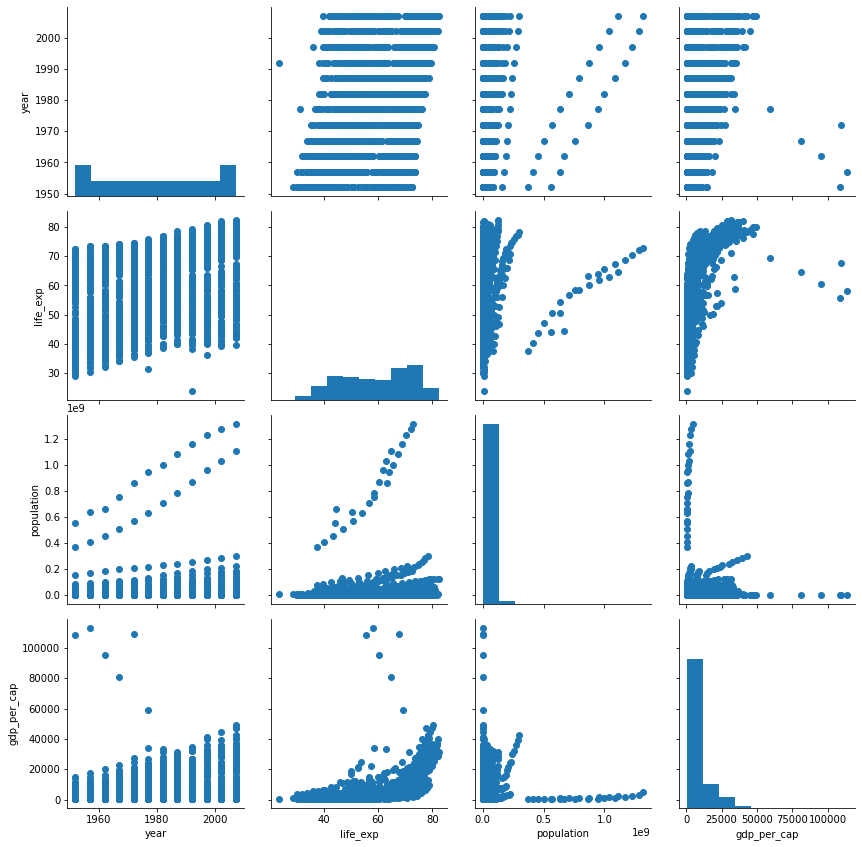

In [371]:
#Visualization of distruption and correlation 

g = sns.PairGrid(data=df, vars=['year', 'life_exp', 'population', 'gdp_per_cap'], height=3)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

In [366]:
df.head()

,country,continent,year,life_exp,population,gdp_per_cap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [243]:
fig = px.scatter(df, x='year', y='gdp_per_cap')
fig.show()

In [244]:
fig = px.scatter(df, x='life_exp', y='gdp_per_cap')
fig.show()

In [245]:
fig = px.scatter(df, x='population', y='gdp_per_cap')
fig.show()

In [266]:
fig = px.scatter(df, x='country', y='gdp_per_cap', color='country')
fig.show()

In [268]:
europe = df.query('continent == "Europe"')

In [271]:
fig = px.scatter(europe, x='country', y='gdp_per_cap', color='year')
fig.show()

In [275]:
fig = px.scatter(europe, x='country', y='year', size='gdp_per_cap', color='population')
fig.show()

In [283]:
fig = px.scatter(europe, x='country', y='population', size='gdp_per_cap', color='year')
fig.show()

In [286]:
germany = df.query('country=="Germany"')

In [288]:
fig = px.line(germany, x='year', y='gdp_per_cap')
fig.show()

### Animated visualization

In [381]:
px.scatter(df, x="gdp_per_cap", y="life_exp")

In [382]:
px.scatter(df, x="gdp_per_cap", y="life_exp", animation_frame="year", 
           size="population", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [358]:
px.scatter(df, x="gdp_per_cap", y="life_exp", animation_frame="year", animation_group="country",
           size="population", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [360]:
px.scatter(df, x="gdp_per_cap", y="life_exp", animation_frame="year", animation_group="country",
           size="population", color="continent", hover_name="country", 
           range_x=[100,100000], range_y=[25,90])

In [365]:
px.scatter(europe, x="gdp_per_cap", y="life_exp", animation_frame="year", animation_group="country",
           size="population", color="country", 
           range_x=[100,50000], range_y=[40,90])

### Include dummy variables for continent

In [246]:
df.continent.value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

In [247]:
df_dummy = df.drop(columns=['country'])

In [248]:
df_dummy = pd.get_dummies(df_dummy)

In [249]:
df_dummy.head()

,year,life_exp,population,gdp_per_cap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,1952,28.801,8425333,779.445314,0,0,1,0,0
1,1957,30.332,9240934,820.853030,0,0,1,0,0
2,1962,31.997,10267083,853.100710,0,0,1,0,0
3,1967,34.020,11537966,836.197138,0,0,1,0,0
4,1972,36.088,13079460,739.981106,0,0,1,0,0


In [250]:
X_dummy = df_dummy.drop(columns=['gdp_per_cap'])

In [251]:
Y_dummy = df_dummy.gdp_per_cap

In [252]:
X_dummy = sm.add_constant(X_dummy)

In [253]:
model_dummy_continent = sm.OLS(Y_dummy,X_dummy)

In [254]:
results_dummy_continent = model_dummy_continent.fit()

In [255]:
results_dummy_continent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gdp_per_cap   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     141.4
Date:                Sat, 25 Jun 2022   Prob (F-statistic):          2.66e-164
Time:                        09:19:14   Log-Likelihood:                -17696.
No. Observations:                1704   AIC:                         3.541e+04
Df Residuals:                    1696   BIC:                         3.545e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.292e+04   2.22e+04     -1.034      0.301   -6.64e+04    2.06e+04
year                   6.5271     13.939      0.468      0.640     -20.812      33.866
life_exp             388.1655     26.037     14.908      0.000     337.097     439.234
population         -6.416e-06   1.86e-06     -3.454      0.001   -1.01e-05   -2.77e-06
continent_Africa   -6707.6449   4688.123     -1.431      0.153   -1.59e+04    2487.469
continent_Americas -7802.1451   4450.063     -1.753      0.080   -1.65e+04     926.046
continent_Asia     -4915.8884   4509.084     -1.090      0.276   -1.38e+04    3928.066
continent_Europe   -3328.0795   4345.070     -0.766      0.444   -1.19e+04    5194.183
continent_Oceania   -169.5052   4494.343     -0.038      0.970   -8984.547    8645.536
==============================================================================
Omnibus:                     1996.307   Durbin-Watson:                   0.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           299082.688
Skew:                           5.848   Prob(JB):                         0.00
Kurtosis:                      66.841   Cond. No.                     5.55e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.72e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Include dummy variables for country

In [256]:
df_dummy_country = pd.get_dummies(df)

In [257]:
df_dummy_country.head()

,year,life_exp,population,gdp_per_cap,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Australia,...,country_Vietnam,country_West Bank and Gaza,"country_Yemen, Rep.",country_Zambia,country_Zimbabwe,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,1952,28.801,8425333,779.445314,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1957,30.332,9240934,820.853030,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1962,31.997,10267083,853.100710,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1967,34.020,11537966,836.197138,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1972,36.088,13079460,739.981106,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [258]:
df_dummy_country = df_dummy_country.drop(columns=['continent_Africa', 'continent_Americas', 'continent_Asia', 'continent_Europe', 'continent_Oceania'])

In [259]:
X_dummy_country = df_dummy_country.drop(columns=['gdp_per_cap'])

In [260]:
Y_dummy_country = df_dummy_country.gdp_per_cap

In [261]:
X_dummy_country = sm.add_constant(X_dummy_country)

In [262]:
model_dummy_country = sm.OLS(Y_dummy_country, X_dummy_country)

In [263]:
results_dummy_country = model_dummy_country.fit()

In [264]:
results_dummy_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gdp_per_cap   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     40.89
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:19:15   Log-Likelihood:                -16755.
No. Observations:                1704   AIC:                         3.380e+04
Df Residuals:                    1559   BIC:                         3.459e+04
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                            -3.323e+05   2.33e+04    -14.244      0.000   -3.78e+05   -2.87e+05
year                               176.9106     12.709     13.921      0.000     151.983     201.838
life_exp                          -137.6640     33.705     -4.084      0.000    -203.775     -71.553
population                       -4.467e-06   3.87e-06     -1.153      0.249   -1.21e-05    3.13e-06
country_Afghanistan              -1.184e+04   1613.872     -7.338      0.000    -1.5e+04   -8676.881
country_Albania                  -5187.6740   1377.564     -3.766      0.000   -7889.748   -2485.600
country_Algeria                  -5234.1811   1367.973     -3.826      0.000   -7917.442   -2550.920
country_Angola                   -9020.3720   1605.771     -5.617      0.000   -1.22e+04   -5870.673
country_Argentina                  715.1326   1372.527      0.521      0.602   -1977.061    3407.326
country_Australia                 1.245e+04   1415.520      8.795      0.000    9672.588    1.52e+04
country_Austria                   1.263e+04   1404.949      8.993      0.000    9878.370    1.54e+04
country_Bahrain                   9235.5574   1368.978      6.746      0.000    6550.324    1.19e+04
country_Bangladesh               -9792.0110   1461.569     -6.700      0.000   -1.27e+04   -6925.163
country_Belgium                   1.221e+04   1408.490      8.667      0.000    9443.966     1.5e+04
country_Benin                    -9986.7370   1446.204     -6.905      0.000   -1.28e+04   -7150.027
country_Bolivia                  -7661.0354   1409.349     -5.436      0.000   -1.04e+04   -4896.617
country_Bosnia and Herzegovina   -5052.5572   1373.981     -3.677      0.000   -7747.602   -2357.512
country_Botswana                 -5323.3637   1394.334     -3.818      0.000   -8058.331   -2588.396
country_Brazil                   -2931.5157   1401.549     -2.092      0.037   -5680.635    -182.397
country_Bulgaria                 -1853.5045   1381.776     -1.341      0.180   -4563.839     856.830
country_Burkina Faso             -1.084e+04   1497.275     -7.243      0.000   -1.38e+04   -7907.966
country_Burundi                  -1.121e+04   1495.698     -7.497      0.000   -1.41e+04   -8279.349
country_Cambodia                 -1.057e+04   1455.855     -7.259      0.000   -1.34e+04   -7711.809
country_Cameroon                 -9431.2708   1453.119     -6.490      0.000   -1.23e+04   -6580.998
country_Canada                    1.496e+04   1414.391     10.574      0.000    1.22e+04    1.77e+04
country_Central African Republic -1.087e+04   1509.226     -7.200      0.000   -1.38e+04   -7905.869
country_Chad                     -1.025e+04   1469.860     -6.971      0.000   -1.31e+04   -7363.908
country_Chile                    -1839.1625   1370.16

### Improve model

In [ ]:
model = sm.OLS(X, Y) 

In [ ]:
model = LinearRegression(X, Y)

In [ ]:
results = model.fit()

In [ ]:
results.summary()